## Explore Data in the Global Emissions Dataset

### Import

In [79]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_palette("tab10")

### Load Data

In [2]:
dataFrame = pd.read_csv('Data/GCB2022v27_MtCO2_flat.csv')
print(dataFrame.describe())
print(dataFrame.info())

               Year         Total          Coal           Oil           Gas  \
count  63104.000000  62904.000000  21744.000000  21717.000000  21618.000000   
mean    1885.500000     55.224788     73.968916     55.760624     23.504285   
std       78.519728    824.845435    598.986992    519.034563    247.674772   
min     1750.000000      0.000000      0.000000      0.000000      0.000000   
25%     1817.750000      0.000000      0.000000      0.091600      0.000000   
50%     1885.500000      0.000000      0.271852      1.044240      0.000000   
75%     1953.250000      0.549342      6.736411      8.339752      0.581628   
max     2021.000000  37123.850352  15051.512770  12345.653374   7921.829472   

             Cement       Flaring        Other    Per Capita  
count  20814.000000  21550.000000  1620.000000  18974.000000  
mean       4.330443      1.712695    10.951389      4.413363  
std       50.305770     16.727067    39.034073     17.432815  
min        0.000000      0.000000   

### Notes on data

Mean year of 1885 is the first interesting that pops out. This obviously relates to the industrial adoption of coal production, I am interested to see what countries differ from this average and possibly why.

I am also intrested to see when and by how much the different countries phased out coal for oil, or if they have at all. I also wonder if any of this data can be correlated to ideology. 

### Exploring the Year

In [64]:
# Recieve min recording year for each country #
min_year = dataFrame.groupby('Country').agg({'Year': ['min']})
print(min_year['Year'])
print(min_year['Year']['min'].unique())

                            min
Country                        
Afghanistan                1750
Albania                    1750
Algeria                    1750
Andorra                    1750
Angola                     1750
...                         ...
Viet Nam                   1750
Wallis and Futuna Islands  1750
Yemen                      1750
Zambia                     1750
Zimbabwe                   1750

[232 rows x 1 columns]
[1750]


Well it seems that, simply put, the data collection starting year was the same for every country. I'm sure that was in the documentation somewhere.

In [57]:
unique_year = dataFrame.groupby('Country').agg({'Year': ['unique']})['Year']['unique']
unique_year.apply(len).unique()

array([272], dtype=int64)

They all cover every single year too -- Consistent! 

### Let's explore 2021 now

In [75]:
# Grab only the most recent year #
recentYear = dataFrame[dataFrame.Year == 2021]
recentYear = recentYear.sort_values(by=['Total'],ascending=False).head(12)
recentYear = recentYear[recentYear.Country != 'Global']
recentYear = recentYear[recentYear.Country != 'International Transport']

Only the big boys for now

In [76]:
recentYear

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
10879,China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741
60111,USA,USA,2021,5007.335889,1002.299987,2233.778180,1637.038462,41.203135,67.684371,25.331754,14.858668
25567,India,IND,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,NaN,1.925088
47327,Russia,RUS,2021,1755.547390,380.227147,403.080393,875.051751,21.920821,58.921786,16.345492,12.098650
27743,Japan,JPN,2021,1067.398435,418.820499,395.359389,221.525076,23.788868,0.344529,7.560075,8.565739
26655,Iran,IRN,2021,748.878752,3.729952,222.961835,466.993766,22.524908,32.668290,NaN,8.517397
21487,Germany,DEU,2021,674.753566,230.221049,248.200624,173.484052,13.233969,1.807425,7.806447,8.089741
49503,Saudi Arabia,SAU,2021,672.379870,0.000000,369.721417,270.065088,28.688192,3.905174,NaN,18.702989
25839,Indonesia,IDN,2021,619.277533,303.153575,210.249416,74.087852,28.637353,3.149338,NaN,2.262175
45695,South Korea,KOR,2021,616.074996,283.908353,171.484229,126.789734,23.704068,0.006091,10.182520,11.886424


TypeError: bar() got multiple values for argument 'width'

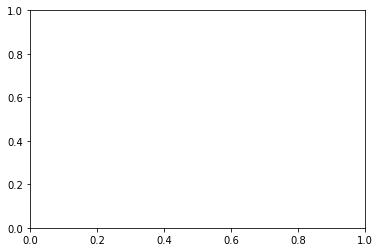

In [84]:
plt = sns.barplot(data=recentYear, x='Country', y='Total', width=2)